In [1]:
import bioread
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
project_dir = os.getcwd().split('\\')[:-2]
project_dir = '\\'.join(project_dir)

In [3]:
video_dir = project_dir + "\\data\\raw\\Video"
video_files = os.listdir(video_dir)
pps = [int(file[4:7]) for file in video_files]

In [4]:
acq_file = 'D:\\Documenten\\Artificial Intelligence Master\\Semester 3\\Internship Mitch\\tDCS_Video_Stress\\data\\raw\\Physiological\\pp121s2.acq'
biodata = bioread.read_file(acq_file)

Text(0.5, 1.0, 'Raw ECG Signal (pp121)')

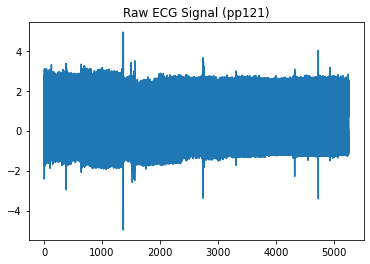

In [5]:
plt.plot(biodata.channels[1].time_index, biodata.channels[1].data)
plt.title('Raw ECG Signal (pp121)')

Text(0.5, 1.0, 'Different components of the study')

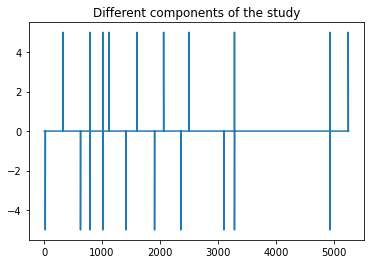

In [7]:
plt.plot(biodata.channels[2].time_index[1:], np.diff(biodata.channels[2].data))
plt.title('Different components of the study')

In [7]:
np.where(np.diff(biodata.channels[2].data)<0)[0]

array([  38561, 1254643, 1576562, 2022534, 2831012, 3812033, 4724366,
       6205962, 6572006, 9864011], dtype=int64)

In [8]:
np.where(np.diff(biodata.channels[2].data[:3000*2000])<0)

(array([  38561, 1254643, 1576562, 2022534, 2831012, 3812033, 4724366],
       dtype=int64),)

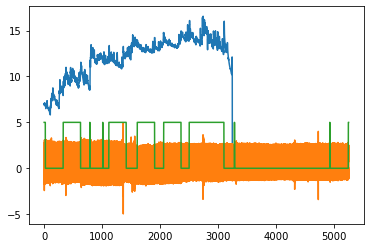

In [9]:
for i in range(3):
    plt.plot(biodata.channels[i].time_index, biodata.channels[i].data)

In [10]:
df=np.copy(biodata.channels[2].data)

In [11]:
starts = np.where(np.diff(df)>0)[0] # Wanneer die aan springt

In [12]:
stops = np.where(np.diff(df)<0)[0] # Wanneer die uitspringt

In [13]:
start = starts[0]
stop = stops[1]

In [14]:
import neurokit2 as nk

In [15]:
plt.rcParams['figure.figsize'] = [15, 5]  # Bigger images

In [16]:
eda_channel = biodata.channels[0]

In [17]:
eda_signal = eda_channel.data[start:stop]

In [18]:
signals, info = nk.eda_process(eda_signal, sampling_rate=2000)

In [19]:
cleaned = signals["EDA_Clean"]
features = [info["SCR_Onsets"], info["SCR_Peaks"], info["SCR_Recovery"]]

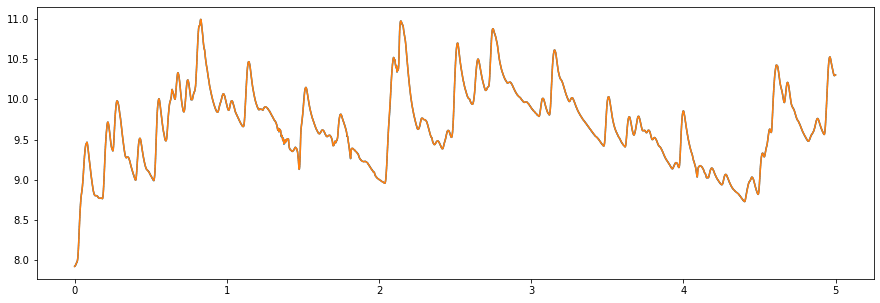

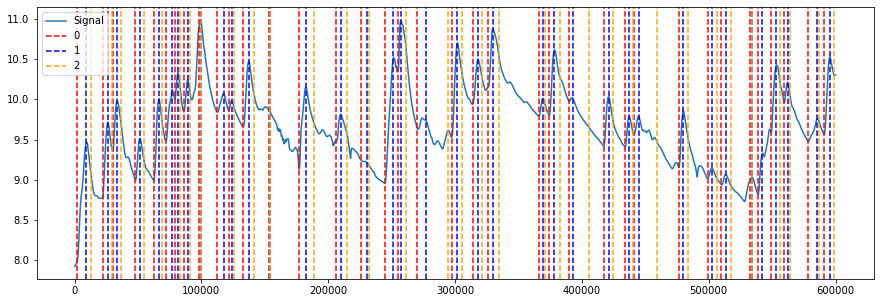

In [20]:
x = np.array(range(0, stop-start))/2000/60
plt.plot(x, eda_signal)
plt.plot(x, cleaned)
plot = nk.events_plot(features, cleaned, color=['red', 'blue', 'orange'])

<AxesSubplot:>

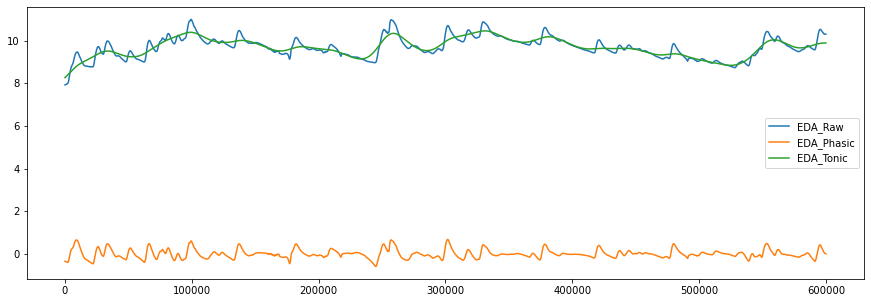

In [21]:
signals[['EDA_Raw', 'EDA_Phasic', 'EDA_Tonic']].plot.line()

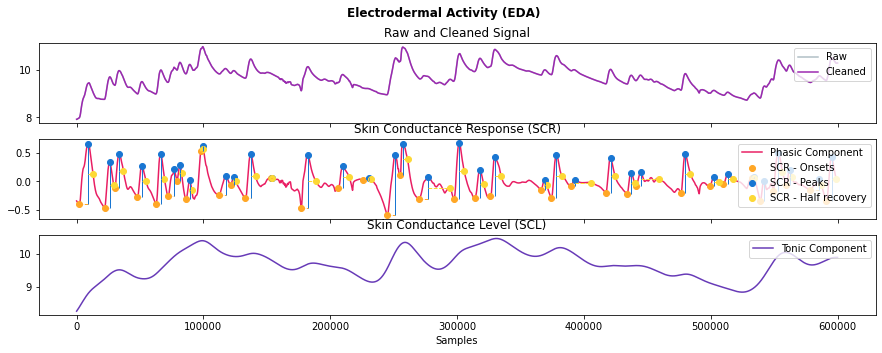

In [22]:
plot = nk.eda_plot(signals)

In [23]:
raw_ecg_signal = biodata.channels[1].data[start:stop]

# Find peaks
cleaned = nk.ecg_clean(raw_ecg_signal, sampling_rate=2000)
peaks, info = nk.ecg_peaks(cleaned, sampling_rate=2000, correct_artifacts=True)

# Compute HRV indices
hrv = nk.hrv_time(peaks, sampling_rate=2000)
hrv.to_dict(orient='records')[0]

{'HRV_RMSSD': 47.334507795816904,
 'HRV_MeanNN': 779.6749347258485,
 'HRV_SDNN': 78.7487102757077,
 'HRV_SDSD': 47.39623575445185,
 'HRV_CVNN': 0.10100197757851166,
 'HRV_CVSD': 0.06071056755526044,
 'HRV_MedianNN': 768.5,
 'HRV_MadNN': 72.64739999999999,
 'HRV_MCVNN': 0.09453142485361092,
 'HRV_IQRNN': 99.75,
 'HRV_pNN50': 18.27676240208877,
 'HRV_pNN20': 53.26370757180157,
 'HRV_TINN': 424.9999999999999,
 'HRV_HTI': 5.550724637681159}

In [24]:
df, info = nk.ecg_process(raw_ecg_signal, sampling_rate=2000)

# Single dataframe is passed
hrv = nk.ecg_intervalrelated(df, sampling_rate=2000)
hrv.to_dict(orient='records')[0]

{'ECG_Rate_Mean': 76.99614116447859,
 'HRV_RMSSD': 47.334507795816904,
 'HRV_MeanNN': 779.6749347258485,
 'HRV_SDNN': 78.7487102757077,
 'HRV_SDSD': 47.39623575445185,
 'HRV_CVNN': 0.10100197757851166,
 'HRV_CVSD': 0.06071056755526044,
 'HRV_MedianNN': 768.5,
 'HRV_MadNN': 72.64739999999999,
 'HRV_MCVNN': 0.09453142485361092,
 'HRV_IQRNN': 99.75,
 'HRV_pNN50': 18.27676240208877,
 'HRV_pNN20': 53.26370757180157,
 'HRV_TINN': 424.9999999999999,
 'HRV_HTI': 5.550724637681159,
 'HRV_ULF': nan,
 'HRV_VLF': nan,
 'HRV_LF': 0.053425905656612,
 'HRV_HF': 0.012433704701714544,
 'HRV_VHF': 0.0007103488029593446,
 'HRV_LFHF': 4.2968613891276375,
 'HRV_LFn': 0.80255277800564,
 'HRV_HFn': 0.18677651088218528,
 'HRV_LnHF': -4.387344372675933,
 'HRV_SD1': 33.514199704689204,
 'HRV_SD2': 106.08092595164248,
 'HRV_SD1SD2': 0.3159304974389724,
 'HRV_S': 11169.044668467908,
 'HRV_CSI': 3.1652531430371575,
 'HRV_CVI': 4.754986137781422,
 'HRV_CSI_Modified': 1343.0919371389134,
 'HRV_PIP': 0.36553524804177